# Machine Learning
# Homework 5
# Name: Guru Sarath Thangamani
# UIN: 829009551

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
X = np.genfromtxt("Data_X.txt", delimiter=" ", skip_header=1)
y = np.genfromtxt("Data_y.txt", delimiter=" ", skip_header=1, dtype=int)
y = y - 1
print('X shape = ', X.shape)
print('y shape = ', y.shape)

X shape =  (10928, 561)
y shape =  (10928,)


In [29]:
features = ['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3', 'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1', 'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3', 'tBodyAcc-Max-1', 'tBodyAcc-Max-2', 'tBodyAcc-Max-3', 'tBodyAcc-Min-1', 'tBodyAcc-Min-2', 'tBodyAcc-Min-3', 'tBodyAcc-SMA-1', 'tBodyAcc-Energy-1', 'tBodyAcc-Energy-2', 'tBodyAcc-Energy-3', 'tBodyAcc-IQR-1', 'tBodyAcc-IQR-2', 'tBodyAcc-IQR-3', 'tBodyAcc-ropy-1', 'tBodyAcc-ropy-1', 'tBodyAcc-ropy-1', 'tBodyAcc-ARCoeff-1', 'tBodyAcc-ARCoeff-2', 'tBodyAcc-ARCoeff-3', 'tBodyAcc-ARCoeff-4', 'tBodyAcc-ARCoeff-5', 'tBodyAcc-ARCoeff-6', 'tBodyAcc-ARCoeff-7', 'tBodyAcc-ARCoeff-8', 'tBodyAcc-ARCoeff-9', 'tBodyAcc-ARCoeff-10', 'tBodyAcc-ARCoeff-11', 'tBodyAcc-ARCoeff-12', 'tBodyAcc-Correlation-1', 'tBodyAcc-Correlation-2', 'tBodyAcc-Correlation-3', 'tGravityAcc-Mean-1', 'tGravityAcc-Mean-2', 'tGravityAcc-Mean-3', 'tGravityAcc-STD-1', 'tGravityAcc-STD-2', 'tGravityAcc-STD-3', 'tGravityAcc-Mad-1', 'tGravityAcc-Mad-2', 'tGravityAcc-Mad-3', 'tGravityAcc-Max-1', 'tGravityAcc-Max-2', 'tGravityAcc-Max-3', 'tGravityAcc-Min-1', 'tGravityAcc-Min-2', 'tGravityAcc-Min-3', 'tGravityAcc-SMA-1', 'tGravityAcc-Energy-1', 'tGravityAcc-Energy-2', 'tGravityAcc-Energy-3', 'tGravityAcc-IQR-1', 'tGravityAcc-IQR-2', 'tGravityAcc-IQR-3', 'tGravityAcc-ropy-1', 'tGravityAcc-ropy-1', 'tGravityAcc-ropy-1', 'tGravityAcc-ARCoeff-1', 'tGravityAcc-ARCoeff-2', 'tGravityAcc-ARCoeff-3', 'tGravityAcc-ARCoeff-4', 'tGravityAcc-ARCoeff-5', 'tGravityAcc-ARCoeff-6', 'tGravityAcc-ARCoeff-7', 'tGravityAcc-ARCoeff-8', 'tGravityAcc-ARCoeff-9', 'tGravityAcc-ARCoeff-10', 'tGravityAcc-ARCoeff-11', 'tGravityAcc-ARCoeff-12', 'tGravityAcc-Correlation-1', 'tGravityAcc-Correlation-2', 'tGravityAcc-Correlation-3', 'tBodyAccJerk-Mean-1', 'tBodyAccJerk-Mean-2', 'tBodyAccJerk-Mean-3', 'tBodyAccJerk-STD-1', 'tBodyAccJerk-STD-2', 'tBodyAccJerk-STD-3', 'tBodyAccJerk-Mad-1', 'tBodyAccJerk-Mad-2', 'tBodyAccJerk-Mad-3', 'tBodyAccJerk-Max-1', 'tBodyAccJerk-Max-2', 'tBodyAccJerk-Max-3', 'tBodyAccJerk-Min-1', 'tBodyAccJerk-Min-2', 'tBodyAccJerk-Min-3', 'tBodyAccJerk-SMA-1', 'tBodyAccJerk-Energy-1', 'tBodyAccJerk-Energy-2', 'tBodyAccJerk-Energy-3', 'tBodyAccJerk-IQR-1', 'tBodyAccJerk-IQR-2', 'tBodyAccJerk-IQR-3', 'tBodyAccJerk-ropy-1', 'tBodyAccJerk-ropy-1', 'tBodyAccJerk-ropy-1', 'tBodyAccJerk-ARCoeff-1', 'tBodyAccJerk-ARCoeff-2', 'tBodyAccJerk-ARCoeff-3', 'tBodyAccJerk-ARCoeff-4', 'tBodyAccJerk-ARCoeff-5', 'tBodyAccJerk-ARCoeff-6', 'tBodyAccJerk-ARCoeff-7', 'tBodyAccJerk-ARCoeff-8', 'tBodyAccJerk-ARCoeff-9', 'tBodyAccJerk-ARCoeff-10', 'tBodyAccJerk-ARCoeff-11', 'tBodyAccJerk-ARCoeff-12', 'tBodyAccJerk-Correlation-1', 'tBodyAccJerk-Correlation-2', 'tBodyAccJerk-Correlation-3', 'tBodyGyro-Mean-1', 'tBodyGyro-Mean-2', 'tBodyGyro-Mean-3', 'tBodyGyro-STD-1', 'tBodyGyro-STD-2', 'tBodyGyro-STD-3', 'tBodyGyro-Mad-1', 'tBodyGyro-Mad-2', 'tBodyGyro-Mad-3', 'tBodyGyro-Max-1', 'tBodyGyro-Max-2', 'tBodyGyro-Max-3', 'tBodyGyro-Min-1', 'tBodyGyro-Min-2', 'tBodyGyro-Min-3', 'tBodyGyro-SMA-1', 'tBodyGyro-Energy-1', 'tBodyGyro-Energy-2', 'tBodyGyro-Energy-3', 'tBodyGyro-IQR-1', 'tBodyGyro-IQR-2', 'tBodyGyro-IQR-3', 'tBodyGyro-ropy-1', 'tBodyGyro-ropy-1', 'tBodyGyro-ropy-1', 'tBodyGyro-ARCoeff-1', 'tBodyGyro-ARCoeff-2', 'tBodyGyro-ARCoeff-3', 'tBodyGyro-ARCoeff-4', 'tBodyGyro-ARCoeff-5', 'tBodyGyro-ARCoeff-6', 'tBodyGyro-ARCoeff-7', 'tBodyGyro-ARCoeff-8', 'tBodyGyro-ARCoeff-9', 'tBodyGyro-ARCoeff-10', 'tBodyGyro-ARCoeff-11', 'tBodyGyro-ARCoeff-12', 'tBodyGyro-Correlation-1', 'tBodyGyro-Correlation-2', 'tBodyGyro-Correlation-3', 'tBodyGyroJerk-Mean-1', 'tBodyGyroJerk-Mean-2', 'tBodyGyroJerk-Mean-3', 'tBodyGyroJerk-STD-1', 'tBodyGyroJerk-STD-2', 'tBodyGyroJerk-STD-3', 'tBodyGyroJerk-Mad-1', 'tBodyGyroJerk-Mad-2', 'tBodyGyroJerk-Mad-3', 'tBodyGyroJerk-Max-1', 'tBodyGyroJerk-Max-2', 'tBodyGyroJerk-Max-3', 'tBodyGyroJerk-Min-1', 'tBodyGyroJerk-Min-2', 'tBodyGyroJerk-Min-3', 'tBodyGyroJerk-SMA-1', 'tBodyGyroJerk-Energy-1', 'tBodyGyroJerk-Energy-2', 'tBodyGyroJerk-Energy-3', 'tBodyGyroJerk-IQR-1', 'tBodyGyroJerk-IQR-2', 'tBodyGyroJerk-IQR-3', 'tBodyGyroJerk-ropy-1', 'tBodyGyroJerk-ropy-1', 'tBodyGyroJerk-ropy-1', 'tBodyGyroJerk-ARCoeff-1', 'tBodyGyroJerk-ARCoeff-2', 'tBodyGyroJerk-ARCoeff-3', 'tBodyGyroJerk-ARCoeff-4', 'tBodyGyroJerk-ARCoeff-5', 'tBodyGyroJerk-ARCoeff-6', 'tBodyGyroJerk-ARCoeff-7', 'tBodyGyroJerk-ARCoeff-8', 'tBodyGyroJerk-ARCoeff-9', 'tBodyGyroJerk-ARCoeff-10', 'tBodyGyroJerk-ARCoeff-11', 'tBodyGyroJerk-ARCoeff-12', 'tBodyGyroJerk-Correlation-1', 'tBodyGyroJerk-Correlation-2', 'tBodyGyroJerk-Correlation-3', 'tBodyAccMag-Mean-1', 'tBodyAccMag-STD-1', 'tBodyAccMag-Mad-1', 'tBodyAccMag-Max-1', 'tBodyAccMag-Min-1', 'tBodyAccMag-SMA-1', 'tBodyAccMag-Energy-1', 'tBodyAccMag-IQR-1', 'tBodyAccMag-ropy-1', 'tBodyAccMag-ARCoeff-1', 'tBodyAccMag-ARCoeff-2', 'tBodyAccMag-ARCoeff-3', 'tBodyAccMag-ARCoeff-4', 'tGravityAccMag-Mean-1', 'tGravityAccMag-STD-1', 'tGravityAccMag-Mad-1', 'tGravityAccMag-Max-1', 'tGravityAccMag-Min-1', 'tGravityAccMag-SMA-1', 'tGravityAccMag-Energy-1', 'tGravityAccMag-IQR-1', 'tGravityAccMag-ropy-1', 'tGravityAccMag-ARCoeff-1', 'tGravityAccMag-ARCoeff-2', 'tGravityAccMag-ARCoeff-3', 'tGravityAccMag-ARCoeff-4', 'tBodyAccJerkMag-Mean-1', 'tBodyAccJerkMag-STD-1', 'tBodyAccJerkMag-Mad-1', 'tBodyAccJerkMag-Max-1', 'tBodyAccJerkMag-Min-1', 'tBodyAccJerkMag-SMA-1', 'tBodyAccJerkMag-Energy-1', 'tBodyAccJerkMag-IQR-1', 'tBodyAccJerkMag-ropy-1', 'tBodyAccJerkMag-ARCoeff-1', 'tBodyAccJerkMag-ARCoeff-2', 'tBodyAccJerkMag-ARCoeff-3', 'tBodyAccJerkMag-ARCoeff-4', 'tBodyGyroMag-Mean-1', 'tBodyGyroMag-STD-1', 'tBodyGyroMag-Mad-1', 'tBodyGyroMag-Max-1', 'tBodyGyroMag-Min-1', 'tBodyGyroMag-SMA-1', 'tBodyGyroMag-Energy-1', 'tBodyGyroMag-IQR-1', 'tBodyGyroMag-ropy-1', 'tBodyGyroMag-ARCoeff-1', 'tBodyGyroMag-ARCoeff-2', 'tBodyGyroMag-ARCoeff-3', 'tBodyGyroMag-ARCoeff-4', 'tBodyGyroJerkMag-Mean-1', 'tBodyGyroJerkMag-STD-1', 'tBodyGyroJerkMag-Mad-1', 'tBodyGyroJerkMag-Max-1', 'tBodyGyroJerkMag-Min-1', 'tBodyGyroJerkMag-SMA-1', 'tBodyGyroJerkMag-Energy-1', 'tBodyGyroJerkMag-IQR-1', 'tBodyGyroJerkMag-ropy-1', 'tBodyGyroJerkMag-ARCoeff-1', 'tBodyGyroJerkMag-ARCoeff-2', 'tBodyGyroJerkMag-ARCoeff-3', 'tBodyGyroJerkMag-ARCoeff-4', 'fBodyAcc-Mean-1', 'fBodyAcc-Mean-2', 'fBodyAcc-Mean-3', 'fBodyAcc-STD-1', 'fBodyAcc-STD-2', 'fBodyAcc-STD-3', 'fBodyAcc-Mad-1', 'fBodyAcc-Mad-2', 'fBodyAcc-Mad-3', 'fBodyAcc-Max-1', 'fBodyAcc-Max-2', 'fBodyAcc-Max-3', 'fBodyAcc-Min-1', 'fBodyAcc-Min-2', 'fBodyAcc-Min-3', 'fBodyAcc-SMA-1', 'fBodyAcc-Energy-1', 'fBodyAcc-Energy-2', 'fBodyAcc-Energy-3', 'fBodyAcc-IQR-1', 'fBodyAcc-IQR-2', 'fBodyAcc-IQR-3', 'fBodyAcc-ropy-1', 'fBodyAcc-ropy-1', 'fBodyAcc-ropy-1', 'fBodyAcc-MaxInds-1', 'fBodyAcc-MaxInds-2', 'fBodyAcc-MaxInds-3', 'fBodyAcc-MeanFreq-1', 'fBodyAcc-MeanFreq-2', 'fBodyAcc-MeanFreq-3', 'fBodyAcc-Skewness-1', 'fBodyAcc-Kurtosis-1', 'fBodyAcc-Skewness-1', 'fBodyAcc-Kurtosis-1', 'fBodyAcc-Skewness-1', 'fBodyAcc-Kurtosis-1', 'fBodyAcc-BandsEnergyOld-1', 'fBodyAcc-BandsEnergyOld-2', 'fBodyAcc-BandsEnergyOld-3', 'fBodyAcc-BandsEnergyOld-4', 'fBodyAcc-BandsEnergyOld-5', 'fBodyAcc-BandsEnergyOld-6', 'fBodyAcc-BandsEnergyOld-7', 'fBodyAcc-BandsEnergyOld-8', 'fBodyAcc-BandsEnergyOld-9', 'fBodyAcc-BandsEnergyOld-10', 'fBodyAcc-BandsEnergyOld-11', 'fBodyAcc-BandsEnergyOld-12', 'fBodyAcc-BandsEnergyOld-13', 'fBodyAcc-BandsEnergyOld-14', 'fBodyAcc-BandsEnergyOld-15', 'fBodyAcc-BandsEnergyOld-16', 'fBodyAcc-BandsEnergyOld-17', 'fBodyAcc-BandsEnergyOld-18', 'fBodyAcc-BandsEnergyOld-19', 'fBodyAcc-BandsEnergyOld-20', 'fBodyAcc-BandsEnergyOld-21', 'fBodyAcc-BandsEnergyOld-22', 'fBodyAcc-BandsEnergyOld-23', 'fBodyAcc-BandsEnergyOld-24', 'fBodyAcc-BandsEnergyOld-25', 'fBodyAcc-BandsEnergyOld-26', 'fBodyAcc-BandsEnergyOld-27', 'fBodyAcc-BandsEnergyOld-28', 'fBodyAcc-BandsEnergyOld-29', 'fBodyAcc-BandsEnergyOld-30', 'fBodyAcc-BandsEnergyOld-31', 'fBodyAcc-BandsEnergyOld-32', 'fBodyAcc-BandsEnergyOld-33', 'fBodyAcc-BandsEnergyOld-34', 'fBodyAcc-BandsEnergyOld-35', 'fBodyAcc-BandsEnergyOld-36', 'fBodyAcc-BandsEnergyOld-37', 'fBodyAcc-BandsEnergyOld-38', 'fBodyAcc-BandsEnergyOld-39', 'fBodyAcc-BandsEnergyOld-40', 'fBodyAcc-BandsEnergyOld-41', 'fBodyAcc-BandsEnergyOld-42', 'fBodyAccJerk-Mean-1', 'fBodyAccJerk-Mean-2', 'fBodyAccJerk-Mean-3', 'fBodyAccJerk-STD-1', 'fBodyAccJerk-STD-2', 'fBodyAccJerk-STD-3', 'fBodyAccJerk-Mad-1', 'fBodyAccJerk-Mad-2', 'fBodyAccJerk-Mad-3', 'fBodyAccJerk-Max-1', 'fBodyAccJerk-Max-2', 'fBodyAccJerk-Max-3', 'fBodyAccJerk-Min-1', 'fBodyAccJerk-Min-2', 'fBodyAccJerk-Min-3', 'fBodyAccJerk-SMA-1', 'fBodyAccJerk-Energy-1', 'fBodyAccJerk-Energy-2', 'fBodyAccJerk-Energy-3', 'fBodyAccJerk-IQR-1', 'fBodyAccJerk-IQR-2', 'fBodyAccJerk-IQR-3', 'fBodyAccJerk-ropy-1', 'fBodyAccJerk-ropy-1', 'fBodyAccJerk-ropy-1', 'fBodyAccJerk-MaxInds-1', 'fBodyAccJerk-MaxInds-2', 'fBodyAccJerk-MaxInds-3', 'fBodyAccJerk-MeanFreq-1', 'fBodyAccJerk-MeanFreq-2', 'fBodyAccJerk-MeanFreq-3', 'fBodyAccJerk-Skewness-1', 'fBodyAccJerk-Kurtosis-1', 'fBodyAccJerk-Skewness-1', 'fBodyAccJerk-Kurtosis-1', 'fBodyAccJerk-Skewness-1', 'fBodyAccJerk-Kurtosis-1', 'fBodyAccJerk-BandsEnergyOld-1', 'fBodyAccJerk-BandsEnergyOld-2', 'fBodyAccJerk-BandsEnergyOld-3', 'fBodyAccJerk-BandsEnergyOld-4', 'fBodyAccJerk-BandsEnergyOld-5', 'fBodyAccJerk-BandsEnergyOld-6', 'fBodyAccJerk-BandsEnergyOld-7', 'fBodyAccJerk-BandsEnergyOld-8', 'fBodyAccJerk-BandsEnergyOld-9', 'fBodyAccJerk-BandsEnergyOld-10', 'fBodyAccJerk-BandsEnergyOld-11', 'fBodyAccJerk-BandsEnergyOld-12', 'fBodyAccJerk-BandsEnergyOld-13', 'fBodyAccJerk-BandsEnergyOld-14', 'fBodyAccJerk-BandsEnergyOld-15', 'fBodyAccJerk-BandsEnergyOld-16', 'fBodyAccJerk-BandsEnergyOld-17', 'fBodyAccJerk-BandsEnergyOld-18', 'fBodyAccJerk-BandsEnergyOld-19', 'fBodyAccJerk-BandsEnergyOld-20', 'fBodyAccJerk-BandsEnergyOld-21', 'fBodyAccJerk-BandsEnergyOld-22', 'fBodyAccJerk-BandsEnergyOld-23', 'fBodyAccJerk-BandsEnergyOld-24', 'fBodyAccJerk-BandsEnergyOld-25', 'fBodyAccJerk-BandsEnergyOld-26', 'fBodyAccJerk-BandsEnergyOld-27', 'fBodyAccJerk-BandsEnergyOld-28', 'fBodyAccJerk-BandsEnergyOld-29', 'fBodyAccJerk-BandsEnergyOld-30', 'fBodyAccJerk-BandsEnergyOld-31', 'fBodyAccJerk-BandsEnergyOld-32', 'fBodyAccJerk-BandsEnergyOld-33', 'fBodyAccJerk-BandsEnergyOld-34', 'fBodyAccJerk-BandsEnergyOld-35', 'fBodyAccJerk-BandsEnergyOld-36', 'fBodyAccJerk-BandsEnergyOld-37', 'fBodyAccJerk-BandsEnergyOld-38', 'fBodyAccJerk-BandsEnergyOld-39', 'fBodyAccJerk-BandsEnergyOld-40', 'fBodyAccJerk-BandsEnergyOld-41', 'fBodyAccJerk-BandsEnergyOld-42', 'fBodyGyro-Mean-1', 'fBodyGyro-Mean-2', 'fBodyGyro-Mean-3', 'fBodyGyro-STD-1', 'fBodyGyro-STD-2', 'fBodyGyro-STD-3', 'fBodyGyro-Mad-1', 'fBodyGyro-Mad-2', 'fBodyGyro-Mad-3', 'fBodyGyro-Max-1', 'fBodyGyro-Max-2', 'fBodyGyro-Max-3', 'fBodyGyro-Min-1', 'fBodyGyro-Min-2', 'fBodyGyro-Min-3', 'fBodyGyro-SMA-1', 'fBodyGyro-Energy-1', 'fBodyGyro-Energy-2', 'fBodyGyro-Energy-3', 'fBodyGyro-IQR-1', 'fBodyGyro-IQR-2', 'fBodyGyro-IQR-3', 'fBodyGyro-ropy-1', 'fBodyGyro-ropy-1', 'fBodyGyro-ropy-1', 'fBodyGyro-MaxInds-1', 'fBodyGyro-MaxInds-2', 'fBodyGyro-MaxInds-3', 'fBodyGyro-MeanFreq-1', 'fBodyGyro-MeanFreq-2', 'fBodyGyro-MeanFreq-3', 'fBodyGyro-Skewness-1', 'fBodyGyro-Kurtosis-1', 'fBodyGyro-Skewness-1', 'fBodyGyro-Kurtosis-1', 'fBodyGyro-Skewness-1', 'fBodyGyro-Kurtosis-1', 'fBodyGyro-BandsEnergyOld-1', 'fBodyGyro-BandsEnergyOld-2', 'fBodyGyro-BandsEnergyOld-3', 'fBodyGyro-BandsEnergyOld-4', 'fBodyGyro-BandsEnergyOld-5', 'fBodyGyro-BandsEnergyOld-6', 'fBodyGyro-BandsEnergyOld-7', 'fBodyGyro-BandsEnergyOld-8', 'fBodyGyro-BandsEnergyOld-9', 'fBodyGyro-BandsEnergyOld-10', 'fBodyGyro-BandsEnergyOld-11', 'fBodyGyro-BandsEnergyOld-12', 'fBodyGyro-BandsEnergyOld-13', 'fBodyGyro-BandsEnergyOld-14', 'fBodyGyro-BandsEnergyOld-15', 'fBodyGyro-BandsEnergyOld-16', 'fBodyGyro-BandsEnergyOld-17', 'fBodyGyro-BandsEnergyOld-18', 'fBodyGyro-BandsEnergyOld-19', 'fBodyGyro-BandsEnergyOld-20', 'fBodyGyro-BandsEnergyOld-21', 'fBodyGyro-BandsEnergyOld-22', 'fBodyGyro-BandsEnergyOld-23', 'fBodyGyro-BandsEnergyOld-24', 'fBodyGyro-BandsEnergyOld-25', 'fBodyGyro-BandsEnergyOld-26', 'fBodyGyro-BandsEnergyOld-27', 'fBodyGyro-BandsEnergyOld-28', 'fBodyGyro-BandsEnergyOld-29', 'fBodyGyro-BandsEnergyOld-30', 'fBodyGyro-BandsEnergyOld-31', 'fBodyGyro-BandsEnergyOld-32', 'fBodyGyro-BandsEnergyOld-33', 'fBodyGyro-BandsEnergyOld-34', 'fBodyGyro-BandsEnergyOld-35', 'fBodyGyro-BandsEnergyOld-36', 'fBodyGyro-BandsEnergyOld-37', 'fBodyGyro-BandsEnergyOld-38', 'fBodyGyro-BandsEnergyOld-39', 'fBodyGyro-BandsEnergyOld-40', 'fBodyGyro-BandsEnergyOld-41', 'fBodyGyro-BandsEnergyOld-42', 'fBodyAccMag-Mean-1', 'fBodyAccMag-STD-1', 'fBodyAccMag-Mad-1', 'fBodyAccMag-Max-1', 'fBodyAccMag-Min-1', 'fBodyAccMag-SMA-1', 'fBodyAccMag-Energy-1', 'fBodyAccMag-IQR-1', 'fBodyAccMag-ropy-1', 'fBodyAccMag-MaxInds-1', 'fBodyAccMag-MeanFreq-1', 'fBodyAccMag-Skewness-1', 'fBodyAccMag-Kurtosis-1', 'fBodyAccJerkMag-Mean-1', 'fBodyAccJerkMag-STD-1', 'fBodyAccJerkMag-Mad-1', 'fBodyAccJerkMag-Max-1', 'fBodyAccJerkMag-Min-1', 'fBodyAccJerkMag-SMA-1', 'fBodyAccJerkMag-Energy-1', 'fBodyAccJerkMag-IQR-1', 'fBodyAccJerkMag-ropy-1', 'fBodyAccJerkMag-MaxInds-1', 'fBodyAccJerkMag-MeanFreq-1', 'fBodyAccJerkMag-Skewness-1', 'fBodyAccJerkMag-Kurtosis-1', 'fBodyGyroMag-Mean-1', 'fBodyGyroMag-STD-1', 'fBodyGyroMag-Mad-1', 'fBodyGyroMag-Max-1', 'fBodyGyroMag-Min-1', 'fBodyGyroMag-SMA-1', 'fBodyGyroMag-Energy-1', 'fBodyGyroMag-IQR-1', 'fBodyGyroMag-ropy-1', 'fBodyGyroMag-MaxInds-1', 'fBodyGyroMag-MeanFreq-1', 'fBodyGyroMag-Skewness-1', 'fBodyGyroMag-Kurtosis-1', 'fBodyGyroJerkMag-Mean-1', 'fBodyGyroJerkMag-STD-1', 'fBodyGyroJerkMag-Mad-1', 'fBodyGyroJerkMag-Max-1', 'fBodyGyroJerkMag-Min-1', 'fBodyGyroJerkMag-SMA-1', 'fBodyGyroJerkMag-Energy-1', 'fBodyGyroJerkMag-IQR-1', 'fBodyGyroJerkMag-ropy-1', 'fBodyGyroJerkMag-MaxInds-1', 'fBodyGyroJerkMag-MeanFreq-1', 'fBodyGyroJerkMag-Skewness-1', 'fBodyGyroJerkMag-Kurtosis-1', 'tBodyAcc-AngleWRTGravity-1', 'tBodyAccJerk-AngleWRTGravity-1', 'tBodyGyro-AngleWRTGravity-1', 'tBodyGyroJerk-AngleWRTGravity-1', 'tXAxisAcc-AngleWRTGravity-1', 'tYAxisAcc-AngleWRTGravity-1', 'tZAxisAcc-AngleWRTGravity-1']
classes = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']  

# (e) Split data into train, test, and validation.

In [4]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=3)

print('TrainX shape = ', X_train.shape)
print('TestX shape = ', X_test.shape)
print('ValX shape = ', X_val.shape)

TrainX shape =  (8742, 561)
TestX shape =  (1093, 561)
ValX shape =  (1093, 561)


# (c) Data pre-processing.

In [5]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_val_categorical = to_categorical(y_val)

print('Train y shape = ', y_train_categorical.shape)
print('Test y shape = ', y_test_categorical.shape)
print('Val y shape = ', y_val_categorical.shape)

Train y shape =  (8742, 12)
Test y shape =  (1093, 12)
Val y shape =  (1093, 12)


# Check for missing data

In [55]:
MissingMatrix = np.isnan(X_train)
MissingMatrix2 = np.isnan(y_train)
if np.sum(MissingMatrix) > 0 or np.sum(MissingMatrix2) > 0:
    print('Train set contains missing data !!')
else:
    print('No missing data in the train set :)')
    
MissingMatrix = np.isnan(X_test)
MissingMatrix2 = np.isnan(y_test)
if np.sum(MissingMatrix) > 0 or np.sum(MissingMatrix2) > 0:
    print('Test set contains missing data !!')
else:
    print('No missing data in the test set :)')
    
MissingMatrix = np.isnan(X_val)
MissingMatrix2 = np.isnan(y_val)
if np.sum(MissingMatrix) > 0 or np.sum(MissingMatrix2) > 0:
    print('Validation set contains missing data !!')
else:
    print('No missing data in the Validation set :)')
    

No missing data in the train set :)
No missing data in the test set :)
No missing data in the Validation set :)


# (d) Data exploration.

# Number of samples in each class output type

In [143]:
print('For the Train dataset')
for i in range(len(classes)):
    print('Class : ', i , ' : ', classes[i] , ' : ', np.sum(y_train == i))

print('For the Test dataset')
for i in range(len(classes)):
    print('Class : ', i , ' : ', classes[i] , ' : ', np.sum(y_test == i))

print('For the Validation dataset')
for i in range(len(classes)):
    print('Class : ', i, ' : ' ,classes[i] , ' : ', np.sum(y_val == i))

For the Train dataset
Class :  0  :  WALKING  :  1367
Class :  1  :  WALKING_UPSTAIRS  :  1232
Class :  2  :  WALKING_DOWNSTAIRS  :  1147
Class :  3  :  SITTING  :  1445
Class :  4  :  STANDING  :  1581
Class :  5  :  LAYING  :  1553
Class :  6  :  STAND_TO_SIT  :  53
Class :  7  :  SIT_TO_STAND  :  25
Class :  8  :  SIT_TO_LIE  :  84
Class :  9  :  LIE_TO_SIT  :  70
Class :  10  :  STAND_TO_LIE  :  114
Class :  11  :  LIE_TO_STAND  :  71
For the Test dataset
Class :  0  :  WALKING  :  198
Class :  1  :  WALKING_UPSTAIRS  :  152
Class :  2  :  WALKING_DOWNSTAIRS  :  125
Class :  3  :  SITTING  :  185
Class :  4  :  STANDING  :  194
Class :  5  :  LAYING  :  192
Class :  6  :  STAND_TO_SIT  :  9
Class :  7  :  SIT_TO_STAND  :  3
Class :  8  :  SIT_TO_LIE  :  9
Class :  9  :  LIE_TO_SIT  :  9
Class :  10  :  STAND_TO_LIE  :  11
Class :  11  :  LIE_TO_STAND  :  6
For the Validation dataset
Class :  0  :  WALKING  :  157
Class :  1  :  WALKING_UPSTAIRS  :  160
Class :  2  :  WALKING_DOWNST

# Histogram

In [149]:
selectedFeatures_index = [41, 9, 52, 228, 202, 70, 433, 193, 123, 121, 243, 6, 83, 502, 541]

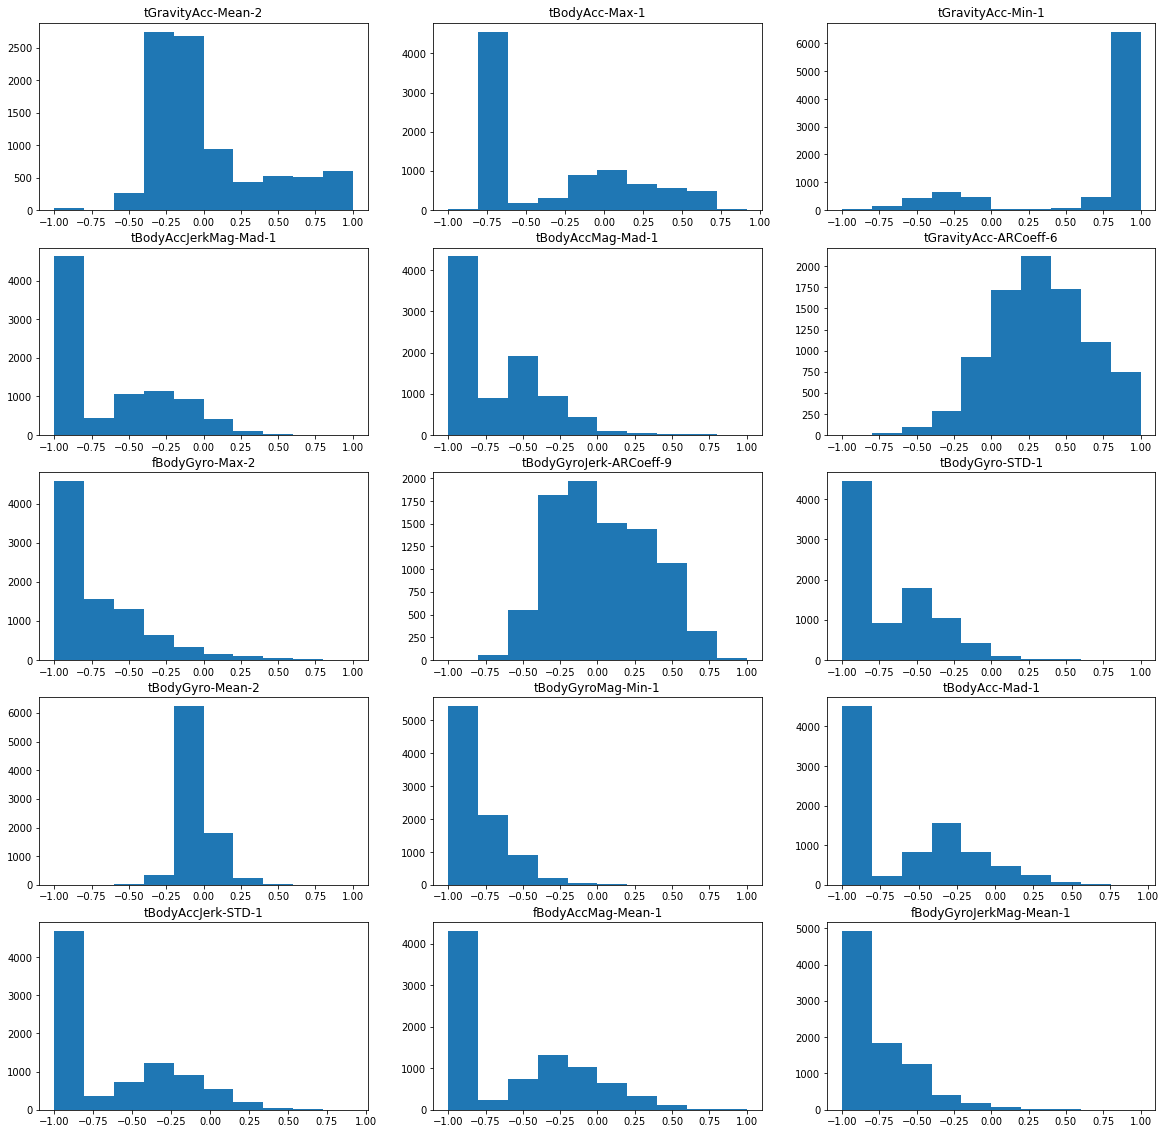

In [152]:
fig,axs = plt.subplots(5,3, figsize=(20,20))
for i,feat in enumerate(selectedFeatures_index):
    plt.subplot(5,3,i+1)
    plt.title(features[feat])
    plt.hist(X_train[:,feat])

# Fishers_criterion

In [41]:
def Fishers_criterion(X,y,classList, featureIndex):
    
    d = featureIndex
    
    mean_d = np.mean(X[:,d])
    mean_kd_List = []
    Numerator = 0
    for classX in classList:
        
        y_new = (y == classX)
        sample_index = 0
        mean_kd = 0
        for yCheck in y_new:
            if yCheck:
                mean_kd += X[sample_index, d]
            
            sample_index += 1
            
        mean_kd = mean_kd / np.sum(y_new)
        mean_kd_List.append(mean_kd)
        
        sample_index = 0
        for yCheck in y_new:
            if yCheck:
                Numerator += (X[sample_index,d] - mean_kd)**2
    
    denominator = 0
    index = 0
    for classX in classList:
        denominator += (mean_d - mean_kd_List[index])
        index += 1
        
    return Numerator / denominator

In [43]:
for featureIndex in range(X.shape[1]):
    print(
            features[featureIndex],
            '    ',
            Fishers_criterion(X_train,y_train,[i for i in range(np.max(y_train))], featureIndex)
         )

tBodyAcc-Mean-1      346.2946737127763
tBodyAcc-Mean-2      -1291.523857992131
tBodyAcc-Mean-3      -201.6430868433005
tBodyAcc-STD-1      -2027.6905052563761
tBodyAcc-STD-2      -518.2543566783183
tBodyAcc-STD-3      -307.4148314154306
tBodyAcc-Mad-1      -1881.8039471049865
tBodyAcc-Mad-2      -419.1340663207205
tBodyAcc-Mad-3      -232.24582131523792
tBodyAcc-Max-1      -4929.107662580646
tBodyAcc-Max-2      -375.21369800374674
tBodyAcc-Max-3      -352.08061423459964
tBodyAcc-Min-1      746.2626528052139
tBodyAcc-Min-2      1379.1816420338805
tBodyAcc-Min-3      527.1803835701816
tBodyAcc-SMA-1      -366.70343700650545
tBodyAcc-Energy-1      -615.3884824126255
tBodyAcc-Energy-2      -65.02657545768645
tBodyAcc-Energy-3      -52.5042777875331
tBodyAcc-IQR-1      -1460.3731755675592
tBodyAcc-IQR-2      -252.61864586924926
tBodyAcc-IQR-3      -153.8873772963894
tBodyAcc-ropy-1      -1705.0996781101687
tBodyAcc-ropy-1      -1932.0762961223443
tBodyAcc-ropy-1      -698.4205681984639
tBod

tBodyAccMag-Mad-1      -244.08358372113594
tBodyAccMag-Max-1      -696.9583772618921
tBodyAccMag-Min-1      -199.99396117987868
tBodyAccMag-SMA-1      -405.5185798582338
tBodyAccMag-Energy-1      -142.39168634442436
tBodyAccMag-IQR-1      -153.39879258534057
tBodyAccMag-ropy-1      -1515.1693568743133
tBodyAccMag-ARCoeff-1      140.30945438983568
tBodyAccMag-ARCoeff-2      -109.2216392288144
tBodyAccMag-ARCoeff-3      90.96010140760174
tBodyAccMag-ARCoeff-4      -84.81639392372719
tGravityAccMag-Mean-1      -405.5185798582338
tGravityAccMag-STD-1      -309.0690966066833
tGravityAccMag-Mad-1      -244.08358372113594
tGravityAccMag-Max-1      -696.9583772618921
tGravityAccMag-Min-1      -199.99396117987868
tGravityAccMag-SMA-1      -405.5185798582338
tGravityAccMag-Energy-1      -142.39168634442436
tGravityAccMag-IQR-1      -153.39879258534057
tGravityAccMag-ropy-1      -1515.1693568743133
tGravityAccMag-ARCoeff-1      140.30945438983568
tGravityAccMag-ARCoeff-2      -109.2216392288144
t

fBodyAccJerk-BandsEnergyOld-11      554.6589718356898
fBodyAccJerk-BandsEnergyOld-12      397.7110526077702
fBodyAccJerk-BandsEnergyOld-13      888.7055983696196
fBodyAccJerk-BandsEnergyOld-14      874.3027884867209
fBodyAccJerk-BandsEnergyOld-15      7039.609912692185
fBodyAccJerk-BandsEnergyOld-16      817.0371943721794
fBodyAccJerk-BandsEnergyOld-17      980.5845137377555
fBodyAccJerk-BandsEnergyOld-18      7472.214660481061
fBodyAccJerk-BandsEnergyOld-19      895.5759105014087
fBodyAccJerk-BandsEnergyOld-20      6328.08262205447
fBodyAccJerk-BandsEnergyOld-21      6180.140248045382
fBodyAccJerk-BandsEnergyOld-22      285.61524262241835
fBodyAccJerk-BandsEnergyOld-23      1254.2561232517057
fBodyAccJerk-BandsEnergyOld-24      1284.8238265577277
fBodyAccJerk-BandsEnergyOld-25      2396.238329817791
fBodyAccJerk-BandsEnergyOld-26      5262.721167234087
fBodyAccJerk-BandsEnergyOld-27      1187.3260031242826
fBodyAccJerk-BandsEnergyOld-28      2137.4153249206433
fBodyAccJerk-BandsEnergy

# Pearson’s correlation 

In [43]:
from scipy.stats import pearsonr

In [44]:
selectedFeatures_index = [41, 9, 52, 228, 202, 70, 433, 193, 123, 121, 243, 6, 83, 502, 541]

In [60]:
HighlyCorrelatedFeatures = None
HighCorr = float('-inf')
LeastCorrelatedFeatures = None
LeastCorr = float('inf')
for i in range(len(selectedFeatures_index)):
    for j in range(i+1,len(selectedFeatures_index)):
        corr = pearsonr(X_train[:,selectedFeatures_index[i]], X_train[:,selectedFeatures_index[j]])[0]
        
        if HighCorr < np.abs(corr):
            HighCorr = np.abs(corr)
            HighlyCorrelatedFeatures = (features[selectedFeatures_index[i]], features[selectedFeatures_index[j]], corr)

        if LeastCorr > np.abs(corr):
            LeastCorr = np.abs(corr)
            LeastCorrelatedFeatures = (features[selectedFeatures_index[i]], features[selectedFeatures_index[j]], corr)
            
        print(features[selectedFeatures_index[i]], '   ' ,features[selectedFeatures_index[j]], ' :  ', corr)

tGravityAcc-Mean-2     tBodyAcc-Max-1  :   -0.4339063925060642
tGravityAcc-Mean-2     tGravityAcc-Min-1  :   -0.7673838759819631
tGravityAcc-Mean-2     tBodyAccJerkMag-Mad-1  :   -0.46242949843672077
tGravityAcc-Mean-2     tBodyAccMag-Mad-1  :   -0.3146608120167613
tGravityAcc-Mean-2     tGravityAcc-ARCoeff-6  :   -0.14394953210875003
tGravityAcc-Mean-2     fBodyGyro-Max-2  :   -0.38334798517007795
tGravityAcc-Mean-2     tBodyGyroJerk-ARCoeff-9  :   0.4170869799924418
tGravityAcc-Mean-2     tBodyGyro-STD-1  :   -0.42562833469359573
tGravityAcc-Mean-2     tBodyGyro-Mean-2  :   -0.022768282353281204
tGravityAcc-Mean-2     tBodyGyroMag-Min-1  :   -0.3189714567010238
tGravityAcc-Mean-2     tBodyAcc-Mad-1  :   -0.4119864615889127
tGravityAcc-Mean-2     tBodyAccJerk-STD-1  :   -0.47004043188283184
tGravityAcc-Mean-2     fBodyAccMag-Mean-1  :   -0.4114576971618521
tGravityAcc-Mean-2     fBodyGyroJerkMag-Mean-1  :   -0.41869788334286834
tBodyAcc-Max-1     tGravityAcc-Min-1  :   0.3301654837802

In [61]:
print('Highly Correlated features - ', HighlyCorrelatedFeatures)
print('Least Correlated features - ', LeastCorrelatedFeatures)

Highly Correlated features -  ('tBodyAccJerkMag-Mad-1', 'tBodyAccJerk-STD-1', 0.9842726911010856)
Least Correlated features -  ('tBodyAcc-Max-1', 'tBodyGyro-Mean-2', -0.00022302374161254973)


# Training Models

# LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression()
clf.fit(X_train, y_train+1)

predictionsVal = clf.predict(X_val)
predictionsTest = clf.predict(X_test)

print('Accuracy Val = ', np.sum(predictionsVal == (y_val+1)) / y_val.shape[0] )
print('Accuracy Test = ', np.sum(predictionsTest == (y_test+1)) / y_test.shape[0] )

Accuracy Val =  0.9679780420860018
Accuracy Test =  0.9679780420860018


# Neural Network

In [73]:
def Generate_Model_NN1():
    m = models.Sequential()
    m.add(layers.Dense( 50 , input_shape = (561,), activation='relu'))
    m.add(layers.Dropout(0.3))
    m.add(layers.Dense( 50 , activation='relu'))
    m.add(layers.Dropout(0.3))
    m.add(layers.Dense( 50 , activation='relu'))
    m.add(layers.Dropout(0.3))
    m.add(layers.Dense( 12 , activation='sigmoid'))

    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return m

In [85]:
model_1 = Generate_Model_NN1()
model_1.summary()
history = model_1.fit(X_train, y_train_categorical,
                    batch_size=100,
                    epochs=30,
                    validation_data=(X_val, y_val_categorical))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 50)                28100     
_________________________________________________________________
dropout_47 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_48 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_49 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 12)              

In [88]:
loss, test_acc = model_1.evaluate(X_test, y_test_categorical)
print('test_acc: ', test_acc)

loss, val_acc = model_1.evaluate(X_val, y_val_categorical)
print('val_acc: ', val_acc)

loss, train_acc = model_1.evaluate(X_train, y_train_categorical)
print('train_acc: ', train_acc)

1093/1093 [==============================] - 0s 30us/step
test_acc:  0.9332113265991211
1093/1093 [==============================] - 0s 31us/step
val_acc:  0.9368709921836853
8742/8742 [==============================] - 0s 22us/step
train_acc:  0.9604209661483765


In [90]:
#model_1.save('model_1_Test_93_3.h5')

# (f) Feature selection.

In [18]:
def createDataSetWithSelectedFeatures(FullDataSet, FeaturesList):
    
    numFeatures = FullDataSet.shape[1]
    NewReducedDataSet = np.array( [ FullDataSet[:,FeaturesList[0]] ] ).T
    
    for i in range(len(FeaturesList)):
        
        if i == 0:
            continue
            
        if FeaturesList[i] < 0 or FeaturesList[i] > numFeatures-1:
            continue
            
        featureToSelect = FeaturesList[i]
        NewReducedDataSet = np.hstack( (NewReducedDataSet , np.array( [ FullDataSet[:,FeaturesList[i]] ] ).T) )
    
    return NewReducedDataSet


Selecting feature  1
Best Validation accuracy: 0.47118023787740165
Selected Features -  [41]

Selecting feature  2
Best Validation accuracy: 0.7145471180237878
Selected Features -  [41, 9]

Selecting feature  3
Best Validation accuracy: 0.7950594693504117
Selected Features -  [41, 9, 52]

Selecting feature  4
Best Validation accuracy: 0.8453796889295517
Selected Features -  [41, 9, 52, 228]

Selecting feature  5
Best Validation accuracy: 0.8636779505946935
Selected Features -  [41, 9, 52, 228, 202]

Selecting feature  6
Best Validation accuracy: 0.8774016468435498
Selected Features -  [41, 9, 52, 228, 202, 70]

Selecting feature  7
Best Validation accuracy: 0.889295516925892
Selected Features -  [41, 9, 52, 228, 202, 70, 433]

Selecting feature  8
Best Validation accuracy: 0.8947849954254345
Selected Features -  [41, 9, 52, 228, 202, 70, 433, 193]

Selecting feature  9
Best Validation accuracy: 0.9002744739249772
Selected Features -  [41, 9, 52, 228, 202, 70, 433, 193, 123]

Selecting

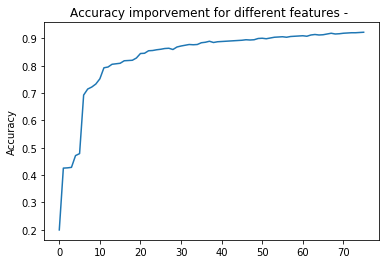

In [21]:
NumFeaturesToSelect = 15
TotalNumFeatures = X_train.shape[1]
#TotalNumFeatures = 50
IncludedFeatures_X = np.zeros(shape=(X_train.shape[0], NumFeaturesToSelect))
IncludedFeatures_list = [-1 for i in range(NumFeaturesToSelect)]


PreviousBestValAcc = 0
EndSelection = False
Accuracies = []
for i in range(NumFeaturesToSelect):
    
    print('\nSelecting feature ', i+1)
        
    bestFeatureIndex = 0
    bestAccuracy = 0
    for feature_index in range(TotalNumFeatures):
        
        if feature_index in IncludedFeatures_list:
            continue
        
        featureX = np.array( [X_train[:,feature_index]] )
        IncludedFeatures_X[:,i] = featureX
        IncludedFeatures_list[i] = feature_index

        clfX = LogisticRegression()
        clfX.fit(IncludedFeatures_X[:,:i+1], (y_train+1))
        
        reducedValidationDataset = createDataSetWithSelectedFeatures(X_val, IncludedFeatures_list)
        predictionsVal = clfX.predict(reducedValidationDataset)
        val_acc = np.sum(predictionsVal == (y_val+1)) / y_val.shape[0] 

        #print(feature_index, ' Accuracy Val = ', val_acc )
        
        if val_acc > bestAccuracy:
            bestAccuracy = val_acc
            Accuracies.append(bestAccuracy)
            bestFeatureIndex = feature_index
    
    print('Best Validation accuracy:', bestAccuracy)
    if bestAccuracy > PreviousBestValAcc:
        PreviousBestValAcc = bestAccuracy
    else:
        break
    
    IncludedFeatures_list[i] = bestFeatureIndex
    IncludedFeatures_X[:,i] = np.array( [X_train[:,bestFeatureIndex]] )
    print('Selected Features - ', [x for x in IncludedFeatures_list if x != -1] )
    

plt.figure()
plt.title('Accuracy imporvement for different features - ')
plt.ylabel('Accuracy')
plt.plot(Accuracies)
print(IncludedFeatures_list)    
    

In [30]:
print('List of selected features - \n')
for i in IncludedFeatures_list:
    print(features[i])

List of selected features - 

tGravityAcc-Mean-2
tBodyAcc-Max-1
tGravityAcc-Min-1
tBodyAccJerkMag-Mad-1
tBodyAccMag-Mad-1
tGravityAcc-ARCoeff-6
fBodyGyro-Max-2
tBodyGyroJerk-ARCoeff-9
tBodyGyro-STD-1
tBodyGyro-Mean-2
tBodyGyroMag-Min-1
tBodyAcc-Mad-1
tBodyAccJerk-STD-1
fBodyAccMag-Mean-1
fBodyGyroJerkMag-Mean-1


In [23]:
X_train_reduced_featuresSelected = createDataSetWithSelectedFeatures(X_train, IncludedFeatures_list)
X_test_reduced_featuresSelected = createDataSetWithSelectedFeatures(X_test, IncludedFeatures_list)

In [24]:
clfX = LogisticRegression()
clfX.fit(X_train_reduced_featuresSelected, (y_train+1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictionsTest = clfX.predict(X_test_reduced_featuresSelected)
test_acc = np.sum(predictionsTest == (y_test+1)) / y_test.shape[0]
print('Accuracy on selected features Test dataset - ', test_acc)

Accuracy on selected features Test dataset -  0.8728270814272644


# (g) Feature transformation (PCA).

In [77]:
from numpy import linalg as LA

In [127]:
def meanNormalize_features(Mat):
    
    NormalizedMat = np.array( [Mat[:,0] - np.mean(Mat[:,0])] ).T
    
    colsMax = Mat.shape[1]
    
    for i in range(colsMax):
        
        if i == 0:
            continue
        
        NormalizedMat = np.hstack( (NormalizedMat, np.array( [Mat[:,i] - np.mean(Mat[:,i])] ).T ) )
    
    return NormalizedMat

def PCA_ML633(MatIn, K, plot='on'):
    
    Mat = meanNormalize_features(MatIn)
    
    CovMat = np.matmul(Mat.T , Mat)
    D = CovMat.shape[0]
    CovMat = CovMat / (D-1)
    
    Lambdas, vectors = LA.eigh(CovMat)
    
    if plot == 'on':
        
        lambda_sum = np.sum(Lambdas)
        plot_y = []
        for i in range(D):
            Vec_index = D - i
            First_i_lambda_sum = np.sum(Lambdas[D-i:D])
            plot_y.append(First_i_lambda_sum / lambda_sum)
        
        plt.title('Power on lambdas')
        plt.xlabel('K ----> ')
        plt.ylabel('Sk ----> ')
        plt.xticks([1,50,100,150,200,250,300,400,500])
        plt.plot(plot_y)
    
    if K > D:
        print('Error K > D')
        return
    
    U = np.array( [vectors[:,D-1]] ).T
    for i in range(K):
        
        if i == 0:
            continue
        
        Vec_index = D - i - 1
        U = np.hstack( (U, np.array( [vectors[:,Vec_index]] ).T) )
        
    return U , np.matmul(Mat, U)

Shape of Train set  (8742, 100)
Shape of Test set  (1093, 100)
Shape of Val set  (1093, 100)


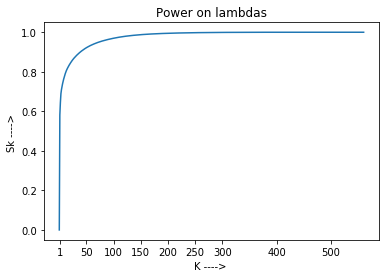

In [128]:
U , X_PCA = PCA_ML633(X , 100)
X_PCA_Train = X_PCA[:8742,:]
X_PCA_val = X_PCA[8742:9835,:]
X_PCA_test = X_PCA[9835:,:]

print('Shape of Train set ', X_PCA_Train.shape)
print('Shape of Test set ', X_PCA_test.shape)
print('Shape of Val set ', X_PCA_val.shape)

In [96]:
plotAcc = []
NumFeaturesInPCA = [2, 5, 10, 50, 100, 200, 300]
for NumFeaturesInPCA in NumFeaturesInPCA:
    print('K = ', NumFeaturesInPCA)
    U , X_PCA = PCA_ML633(X , NumFeaturesInPCA, plot='off')
    
    X_PCA_Train = X_PCA[:8742,:]
    y_PCA_Train = y[:8742]
    X_PCA_val = X_PCA[8742:9835,:]
    y_PCA_val = y[8742:9835]
    X_PCA_test = X_PCA[9835:,:]
    y_PCA_test = y[9835:]

    clf = LogisticRegression()
    clf.fit(X_PCA_Train, y_PCA_Train+1)

    predictionsTrain = clf.predict(X_PCA_Train)
    predictionsVal = clf.predict(X_PCA_val)
    predictionsTest = clf.predict(X_PCA_test)

    accVal = np.sum(predictionsVal == (y_PCA_val+1)) / y_PCA_val.shape[0]
    print('Accuracy Val = ', accVal )
    print('Accuracy Test = ', np.sum(predictionsTest == (y_PCA_test+1)) / y_PCA_test.shape[0] )
    print('Accuracy Train = ', np.sum(predictionsTrain == (y_PCA_Train+1)) / y_PCA_Train.shape[0] )
    plotAcc.append(accVal)
   

K =  2
Accuracy Val =  0.5379688929551693
Accuracy Test =  0.5041171088746569
Accuracy Train =  0.5512468542667581
K =  5
Accuracy Val =  0.7859103385178408
Accuracy Test =  0.7301006404391582
Accuracy Train =  0.7862045298558682
K =  10
Accuracy Val =  0.8298261665141812
Accuracy Test =  0.848124428179323
Accuracy Train =  0.8523221230839625
K =  50
Accuracy Val =  0.9112534309240622
Accuracy Test =  0.9313815187557182
Accuracy Train =  0.945664607641272
K =  100
Accuracy Val =  0.9405306495882891
Accuracy Test =  0.958828911253431
Accuracy Train =  0.9735758407687028
K =  200
Accuracy Val =  0.94967978042086
Accuracy Test =  0.9624885635864593
Accuracy Train =  0.9871882864333105
K =  300
Accuracy Val =  0.9542543458371455
Accuracy Test =  0.9643183897529735
Accuracy Train =  0.9881034088309312


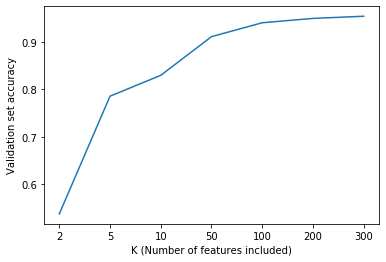

In [124]:
plt.figure()
plt.ylabel('Validation set accuracy')
plt.xlabel('K (Number of features included)')
locs, labels = plt.xticks()
NumFeaturesInPCA = [2, 5, 10, 50, 100, 200, 300]
plt.xticks(np.arange(len(NumFeaturesInPCA)), NumFeaturesInPCA)
plt.plot(plotAcc)

In [117]:
U , X_PCA = PCA_ML633(X , 100, plot='off')
X_PCA_Train = X_PCA[:8742,:]
X_PCA_val = X_PCA[8742:9835,:]
X_PCA_test = X_PCA[9835:,:]

y_cat = to_categorical(y)
y_cat_PCA_Train = y_cat[:8742,:]
y_cat_PCA_val = y_cat[8742:9835,:]
y_cat_PCA_test = y_cat[9835:,:]

In [118]:
def Generate_Model_NN_PCA_DataSet():
    m = models.Sequential()
    m.add(layers.Dense( 30 , input_shape = (100,), activation='relu'))
    m.add(layers.Dropout(0.3))
    m.add(layers.Dense( 30 , activation='relu'))
    m.add(layers.Dropout(0.3))
    m.add(layers.Dense( 30 , activation='relu'))
    m.add(layers.Dropout(0.3))
    m.add(layers.Dense( 12 , activation='sigmoid'))

    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return m

In [119]:
model_1_PCA_Trained = Generate_Model_NN_PCA_DataSet()
model_1_PCA_Trained.summary()
history = model_1_PCA_Trained.fit(X_PCA_Train, y_cat_PCA_Train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(X_PCA_val, y_cat_PCA_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 12)               

In [121]:
loss, test_acc = model_1_PCA_Trained.evaluate(X_PCA_test, y_cat_PCA_test)
print('test_acc: ', test_acc)

loss, val_acc = model_1_PCA_Trained.evaluate(X_PCA_val, y_cat_PCA_val)
print('val_acc: ', val_acc)

loss, train_acc = model_1_PCA_Trained.evaluate(X_PCA_Train, y_cat_PCA_Train)
print('train_acc: ', train_acc)

1093/1093 [==============================] - 0s 22us/step
test_acc:  0.7987191081047058
1093/1093 [==============================] - 0s 26us/step
val_acc:  0.7767612338066101
8742/8742 [==============================] - 0s 20us/step
train_acc:  0.812743067741394


# (h) Support vector machine.

In [56]:
from sklearn import svm

In [132]:
U , X_PCA = PCA_ML633(X , 100, plot='off')
    
X_PCA_Train = X_PCA[:8742,:]
y_PCA_Train = y[:8742]
X_PCA_val = X_PCA[8742:9835,:]
y_PCA_val = y[8742:9835]
X_PCA_test = X_PCA[9835:,:]
y_PCA_test = y[9835:]

In [137]:
accuracyDict = dict()
accuracyDict['linear'] = []
accuracyDict['rbf'] = []
accuracyDict['sigmoid'] = []
accuracyDict['poly'] = []
Reg_values = [0.1, 0.2, 0.5, 1, 10, 50, 100]
for kernelX in ['linear', 'rbf', 'sigmoid', 'poly']:
    for reg in Reg_values:
        print('Kernel: ', kernelX, '  C=', reg)
        SVM_clf = svm.SVC(C=reg, kernel=kernelX)
        SVM_clf.fit(X_PCA_Train, y_PCA_Train+1)
        predictions_val = SVM_clf.predict(X_PCA_val)
        predictions_test = SVM_clf.predict(X_PCA_test)
        acc1 = np.sum(np.equal(predictions_val, y_PCA_val+1)) / y_PCA_val.shape[0]
        acc2 = np.sum(np.equal(predictions_test, y_PCA_test+1)) / y_PCA_test.shape[0]
        print('Val Accuracy = ', acc1, 'Test Accuracy = ', acc2)
        accuracyDict[kernelX].append(acc1)

Kernel:  linear   C= 0.1
Val Accuracy =  0.9432753888380604 Test Accuracy =  0.9432753888380604
Kernel:  linear   C= 0.2
Val Accuracy =  0.9414455626715462 Test Accuracy =  0.9451052150045746
Kernel:  linear   C= 0.5
Val Accuracy =  0.9332113449222323 Test Accuracy =  0.9487648673376029
Kernel:  linear   C= 1
Val Accuracy =  0.929551692589204 Test Accuracy =  0.9505946935041171
Kernel:  linear   C= 10
Val Accuracy =  0.9322964318389753 Test Accuracy =  0.9560841720036597
Kernel:  linear   C= 50
Val Accuracy =  0.9341262580054894 Test Accuracy =  0.9560841720036597
Kernel:  linear   C= 100
Val Accuracy =  0.9332113449222323 Test Accuracy =  0.9560841720036597
Kernel:  rbf   C= 0.1
Val Accuracy =  0.8874656907593779 Test Accuracy =  0.8819762122598354
Kernel:  rbf   C= 0.2
Val Accuracy =  0.9075937785910339 Test Accuracy =  0.9204025617566332
Kernel:  rbf   C= 0.5
Val Accuracy =  0.9277218664226898 Test Accuracy =  0.9277218664226898
Kernel:  rbf   C= 1
Val Accuracy =  0.9368709972552608

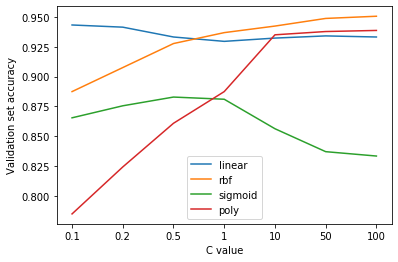

In [139]:
for kernelX in accuracyDict:
    plt.plot(accuracyDict[kernelX], label=kernelX)

plt.legend()
plt.xlabel('C value')
plt.ylabel('Validation set accuracy')
plt.xticks(np.arange(len(Reg_values)), Reg_values)
plt.show()

# (i) Ensemble learning

In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [63]:
Val_accuracy = []
Test_accuracy = []
num_estims = []

for n_est in range(2,20):
    estimator = LogisticRegression(multi_class='ovr')
    clf = AdaBoostClassifier(estimator, n_estimators=n_est, algorithm='SAMME')
    clf.fit(X_train, y_train+1)
    predictions_val = clf.predict(X_val)
    predictions_test = clf.predict(X_test)
    acc1 = np.sum(np.equal(predictions_val, y_val+1)) / y_val.shape[0]
    acc2 = np.sum(np.equal(predictions_test, y_test+1)) / y_test.shape[0]
    Val_accuracy.append(acc1)
    Test_accuracy.append(acc2)
    num_estims.append(n_est)
    print('Number of estimators = ', n_est, 'Val Accuracy = ', acc1, 'Test Accuracy = ', acc2)

Number of estimators =  2 Val Accuracy =  0.7904849039341263 Test Accuracy =  0.8005489478499542
Number of estimators =  3 Val Accuracy =  0.7941445562671546 Test Accuracy =  0.8023787740164684
Number of estimators =  4 Val Accuracy =  0.8069533394327539 Test Accuracy =  0.8115279048490394
Number of estimators =  5 Val Accuracy =  0.8133577310155535 Test Accuracy =  0.8151875571820677
Number of estimators =  6 Val Accuracy =  0.7721866422689845 Test Accuracy =  0.7968892955169259
Number of estimators =  7 Val Accuracy =  0.7703568161024703 Test Accuracy =  0.7804208600182982
Number of estimators =  8 Val Accuracy =  0.747483989021043 Test Accuracy =  0.7822506861848124
Number of estimators =  9 Val Accuracy =  0.7749313815187557 Test Accuracy =  0.8042086001829826
Number of estimators =  10 Val Accuracy =  0.787740164684355 Test Accuracy =  0.807868252516011
Number of estimators =  11 Val Accuracy =  0.7346752058554438 Test Accuracy =  0.7749313815187557
Number of estimators =  12 Val 

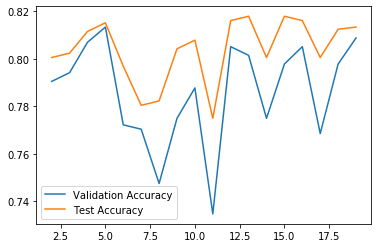

In [71]:
plt.figure()
plt.plot(num_estims, Val_accuracy, label='Validation Accuracy')
plt.plot(num_estims, Test_accuracy, label='Test Accuracy')
plt.legend()

In [72]:
Val_accuracy = []
Test_accuracy = []
num_estims = []

for n_est in range(1,20):
    estimator = DecisionTreeClassifier(max_depth=2)
    clf = AdaBoostClassifier(estimator, n_estimators=n_est, algorithm='SAMME')
    clf.fit(X_train, y_train+1)
    predictions_val = clf.predict(X_val)
    predictions_test = clf.predict(X_test)
    acc1 = np.sum(np.equal(predictions_val, y_val+1)) / y_val.shape[0]
    acc2 = np.sum(np.equal(predictions_test, y_test+1)) / y_test.shape[0]
    Val_accuracy.append(acc1)
    Test_accuracy.append(acc2)
    num_estims.append(n_est)
    print('Number of estimators = ', n_est, 'Val Accuracy = ', acc1, 'Test Accuracy = ', acc2)

Number of estimators =  1 Val Accuracy =  0.5233302836230558 Test Accuracy =  0.5297346752058555
Number of estimators =  2 Val Accuracy =  0.5800548947849954 Test Accuracy =  0.5507776761207686
Number of estimators =  3 Val Accuracy =  0.6550777676120768 Test Accuracy =  0.645928636779506
Number of estimators =  4 Val Accuracy =  0.6907593778591034 Test Accuracy =  0.6770356816102471
Number of estimators =  5 Val Accuracy =  0.6605672461116194 Test Accuracy =  0.6678865507776761
Number of estimators =  6 Val Accuracy =  0.6303751143641354 Test Accuracy =  0.6532479414455626
Number of estimators =  7 Val Accuracy =  0.6907593778591034 Test Accuracy =  0.6733760292772186
Number of estimators =  8 Val Accuracy =  0.7026532479414456 Test Accuracy =  0.6916742909423604
Number of estimators =  9 Val Accuracy =  0.6953339432753889 Test Accuracy =  0.6999085086916743
Number of estimators =  10 Val Accuracy =  0.7108874656907593 Test Accuracy =  0.6816102470265325
Number of estimators =  11 Val